# Import the Libraries

In [1]:
from witcher import Recommender 



# Import Datasetes

In [19]:
df_C_Per_Product=Recommender.pd.read_csv('./data/Customer_per_product.csv',encoding='cp1252').drop_duplicates()
df_C_NPS_Extend=Recommender.pd.read_csv('./data/Customer_NPS_Extended.csv',encoding='cp1252').drop_duplicates()
df_C_NPS_Product=Recommender.pd.read_csv('./data/NPS_Customers_with_Products.csv',encoding='cp1252').drop_duplicates()


# 1) Development : 

## Generate the Recommender Model

Initial ......
                             Fail  Pass
Popularity_based_suggestion   236   229
User_similar                  121   344
Products_neighbors            202   263
Total                          92   373


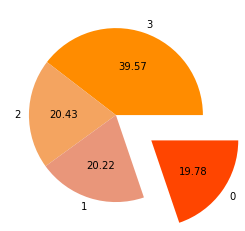

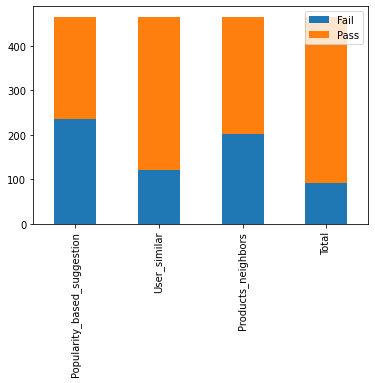

In [20]:
Model_generator=Recommender.Model_Generator(df_C_Per_Product,df_C_NPS_Product,df_C_NPS_Extend,knn_neighbors=200)

# User_Product Utility Matrix 

In [21]:
Model_generator.Product_hist

ProductCode,PR_0001,PR_0002,PR_0008,PR_0011,PR_0015,PR_0019,PR_0021,PR_0024,PR_0029,PR_0030,...,PR_0420,PR_5008,PR_5011,PR_5030,PR_5057,PR_5180,PR_6008,PR_6015,PR_6030,PR_6180
CustomerCIF,,,,,,,,,,,,,,,,,,,,,
Witcher*&*00DWIGHT*,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Witcher*&*00P.*MAHA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Witcher***00ABDOOL*,PR_0001,PR_0002,PR_0008,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Witcher***00ACEDO*E,PR_0001,PR_0002,0,0,PR_0015,0,0,0,0,0,...,0,0,0,0,0,0,PR_6008,0,0,0
Witcher***00ACHONG*,0,0,PR_0008,0,PR_0015,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WitcherZRA01ORRETT*,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
WitcherZU*01JAHOOR*,0,0,0,0,PR_0015,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
WitcherZY*00PIERRE*,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model Accuracy Report

In [14]:
Model_generator.ACC_report

,Fail,Pass
Popularity_based_suggestion,217,227
User_similar,97,347
Products_neighbors,177,267
Total,73,371


In [6]:
Model_generator.model_report

,Product,Product_count,USER,Popularity_based_suggestion,User_similar,Products_neighbors,Flag
0,PROD0120,85613,0,1,1,1,3
1,PROD0001,58408,0,1,0,0,1
2,PROD0125,45029,0,1,1,1,3
3,PROD0008,51455,0,1,1,1,3
4,PROD0030,6692,0,0,0,0,0
...,...,...,...,...,...,...,...
442,PROD0038,39790,0,1,1,1,3
443,PROD0125,45029,0,1,1,1,3
444,PROD6030,1458,0,0,0,0,0
445,PROD6015,17442,0,1,0,0,1


# 2) Production: using the Witcher to recommend a new product

###### For using Witcher in the production level, please use the react folder  

### Recommender system for existing users

In [16]:
products=Recommender.Product_Recommender("Witcher***00ABDOOL*")
Recommender.pprint.pprint(products.report)

{'Popularity_based_suggestion': {'PR_0125': {'CustomerCount': 45029,
                                             'ProductCode': 'PR_0125',
                                             'ProductName': 'Credit Card '
                                                            'Credit Health '
                                                            'Insurance',
                                             'SalesCategoryCornerstoneID': 'INSURANCE'}},
 'User_similar': {'PR_0125': {'CustomerCount': 45029,
                              'ProductCode': 'PR_0125',
                              'ProductName': 'Credit Card Credit Health '
                                             'Insurance',
                              'SalesCategoryCornerstoneID': 'INSURANCE'}},
 'products_neighbors': {'PR_0030': {'CustomerCount': 6692,
                                    'ProductCode': 'PR_0030',
                                    'ProductName': 'Term Deposit',
                                    'Sal

### Recommnd a set of products to the new customer

In [17]:
Requested_Products=["PR_0033",'PR_0052', 'PR_5057', 'PR_5180']
Income=[110000]
NPS=[0]

products=Recommender.Product_Recommender("test",NEW_USER="True",USER_feature=Requested_Products+Income+NPS)
Recommender.pprint.pprint(products.report)





{'Popularity_based_suggestion': {'PR_0126': {'CustomerCount': 6764,
                                             'ProductCode': 'PR_0126',
                                             'ProductName': 'Scotialine Credit '
                                                            'Life Insurance',
                                             'SalesCategoryCornerstoneID': 'INSURANCE'},
                                 'PR_0127': {'CustomerCount': 6462,
                                             'ProductCode': 'PR_0127',
                                             'ProductName': 'Scotialine Credit '
                                                            'health Insurance',
                                             'SalesCategoryCornerstoneID': 'INSURANCE'}},
 'User_similar': {'PR_0015': {'CustomerCount': 83512,
                              'ProductCode': 'PR_0015',
                              'ProductName': 'Scotia Plan Loan',
                              'SalesCategoryCorn

In [18]:
Recommender.pprint.pprint(list(products.report["products_neighbors"].keys()))

['PR_0176', 'PR_6180', 'PR_0107']
